# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/countingSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/countingSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/countingSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [56]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)
dfR23


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms)
0,readCSV-Random1-25000,2.080566,1.818848,,0.173523,56,236.114
1,readCSV-Random1-25000,2.322266,2.055420,,0.191833,56,230.432
2,readCSV-Random1-25000,2.065308,1.817383,,0.169434,56,219.194
3,readCSV-Random1-25000,2.067322,1.824097,,0.172241,56,220.192
4,readCSV-Random1-25000,2.081299,1.833252,,0.170715,56,219.484
...,...,...,...,...,...,...,...
41594,readCSV-Sorted-1000000,7.855164,6.879150,,0.567139,75,840.185
41595,readCSV-Sorted-1000000,7.712952,6.750793,,0.549561,75,810.143
41596,readCSV-Sorted-1000000,7.831177,6.861633,,0.556274,75,832.536
41597,readCSV-Sorted-1000000,7.785706,6.797607,,0.558655,76,824.412


In [57]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

makeinputColumn(dfC6)
makeinputColumn(dfC16)
makeinputColumn(dfC21)
makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
makeinputColumn_readCSV(dfR21)
makeinputColumn_readCSV(dfR23)


             Test name    PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
0      random1-25000-1   5.558350  4.756775            0.380188           72   
1      random1-25000-1   5.314636  4.515320            0.365112           72   
2      random1-25000-1   5.447754  4.662659            0.370605           72   
3      random1-25000-1   5.188416  4.428955            0.356323           72   
4      random1-25000-1   5.204102  4.443542            0.355286           72   
...                ...        ...       ...     ...         ...          ...   
20794  worst-1000000-1  10.212769  8.609131            0.739380           60   
20795  worst-1000000-1  10.300110  8.668518            0.757263           60   
20796  worst-1000000-1  10.474915  8.800232            0.767151           61   
20797  worst-1000000-1  10.169312  8.535522            0.756592           60   
20798  worst-1000000-1  10.342163  8.699158            0.762634           60   

       Time (ms) Input case  
0        

In [58]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
makeSizecolumn_readCSV(dfR21)
makeSizecolumn_readCSV(dfR23)

In [59]:
dfR16

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,readCSV-Random1-25000,2.240601,1.966187,,0.134399,53,227.880,random1,25000
1,readCSV-Random1-25000,2.062317,1.775085,,0.126160,53,250.212,random1,25000
2,readCSV-Random1-25000,2.140869,1.876709,,0.121887,53,222.526,random1,25000
3,readCSV-Random1-25000,2.217102,1.940735,,0.133545,53,226.620,random1,25000
4,readCSV-Random1-25000,2.058533,1.796814,,0.119385,53,219.516,random1,25000
...,...,...,...,...,...,...,...,...,...
41594,readCSV-Sorted-1000000,7.584045,6.620728,,0.382446,69,805.509,sorted,1000000
41595,readCSV-Sorted-1000000,7.647522,6.666382,,0.386780,69,817.192,sorted,1000000
41596,readCSV-Sorted-1000000,7.715393,6.740112,,0.386230,70,828.109,sorted,1000000
41597,readCSV-Sorted-1000000,7.573486,6.611694,,0.383301,70,816.762,sorted,1000000


### remove outliers

In [60]:
def remove_outliers(df, type, size):
    q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] >= LF]

In [61]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    for case in c:
        for size in s:
            remove_outliers(df, case, size)
remove_outliers_for_pc(dfC6)
remove_outliers_for_pc(dfC16)
remove_outliers_for_pc(dfC21)
remove_outliers_for_pc(dfC23)
remove_outliers_for_pc(dfR6)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfR21)
remove_outliers_for_pc(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_14412\2629238994.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\2629238994.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\2629238994.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]


For size, case: 25000,best. Lower fence: 1.2326278686523438 Upper fence: 1.7597885131835938.
For size, case: 50000,best. Lower fence: 1.6665878295898438 Upper fence: 2.1135482788085938.
For size, case: 75000,best. Lower fence: 1.8959426879882812 Upper fence: 2.5839920043945312.
For size, case: 100000,best. Lower fence: 1.9596099853515625 Upper fence: 3.1085357666015625.
For size, case: 200000,best. Lower fence: 2.9184722900390625 Upper fence: 3.8712310791015625.
For size, case: 300000,best. Lower fence: 3.163726806640625 Upper fence: 4.072296142578125.
For size, case: 400000,best. Lower fence: 3.4041366577148446 Upper fence: 4.356590270996093.
For size, case: 500000,best. Lower fence: 3.5906524658203134 Upper fence: 4.594802856445312.
For size, case: 600000,best. Lower fence: 3.8771514892578125 Upper fence: 4.7932891845703125.
For size, case: 700000,best. Lower fence: 4.049385070800781 Upper fence: 5.043342590332031.
For size, case: 800000,best. Lower fence: 4.517219543457031 Upper fen

In [62]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
meanC21 = mean_of_dataset(dfC21)
meanC23 = mean_of_dataset(dfC23)



C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [63]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
meanR21 = mean_of_dataset_readCSV(dfR21)
meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [64]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [89]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\langk\AppData\Local\Temp\ipykernel_14412\3462347420.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\3462347420.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\3462347420.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14412\3462347420.py:21: UserWarning: B

In [67]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case,CPU - readCSV,Time - readCSV,memory - readCSV
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best,-0.022315,-4.373005,0.004066
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best,-0.032554,-0.801982,0.005697
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best,-0.018707,3.899080,0.008749
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best,0.019382,6.482725,0.012215
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best,0.019383,5.614648,0.010284
...,...,...,...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10,1.779062,440.325288,0.286800
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10,2.311401,498.540550,0.361217
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10,2.184332,492.625475,0.375076
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10,1.568930,447.273600,0.333018


# BEST

In [72]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [97]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(20,10))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [98]:
listOfDF = [meanC6, meanC16, meanC21, meanC23]
colors = ["red", "green", "blue", "orange"]

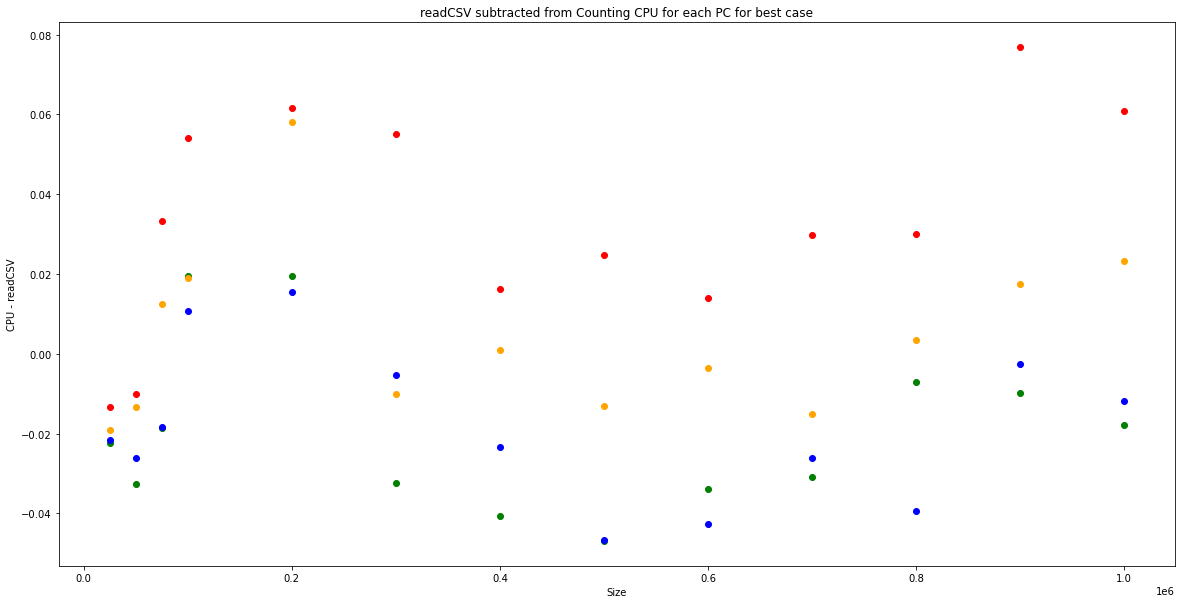

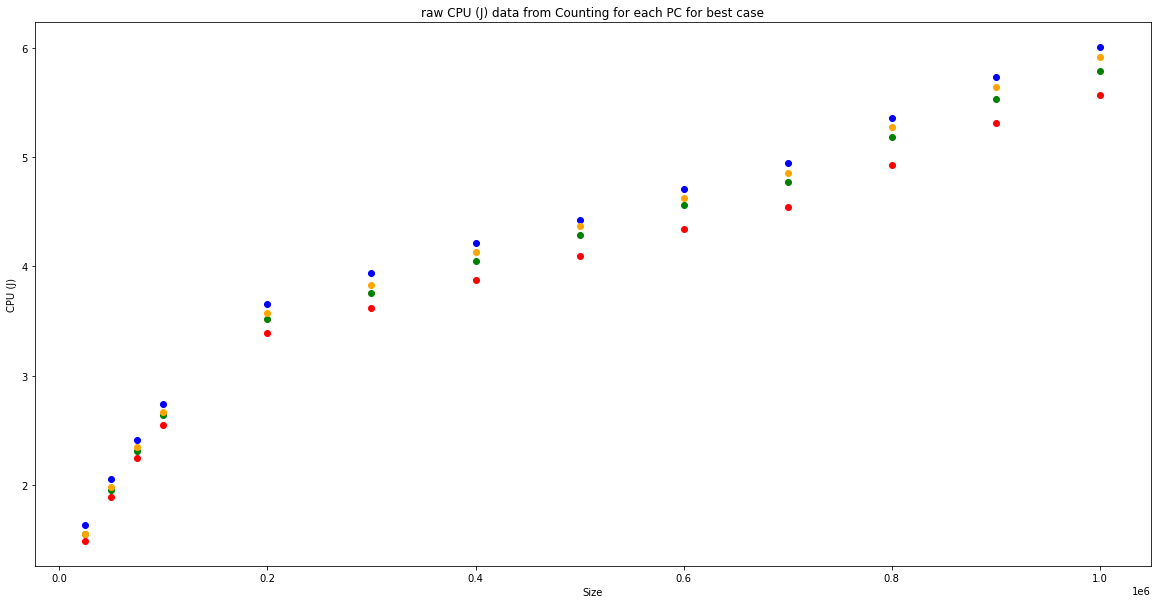

In [99]:

plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


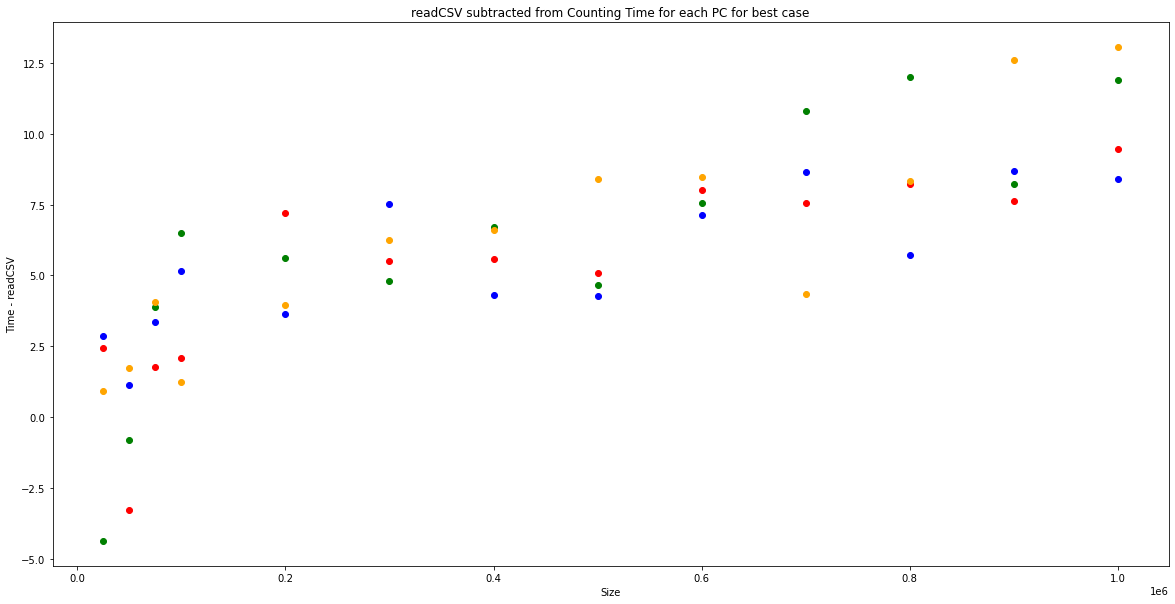

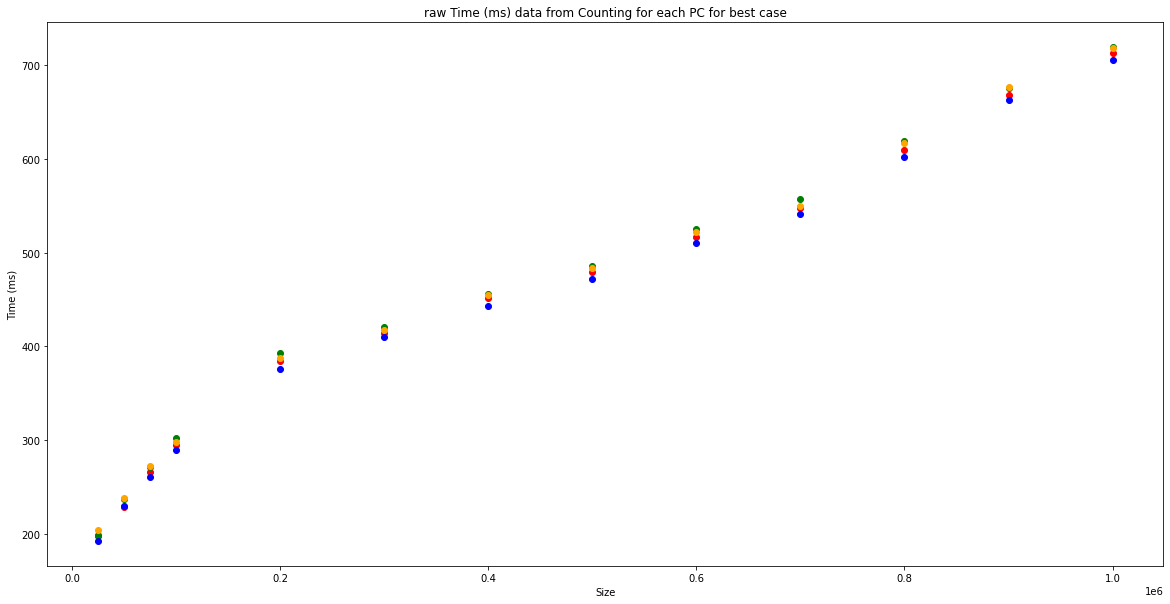

In [100]:
plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

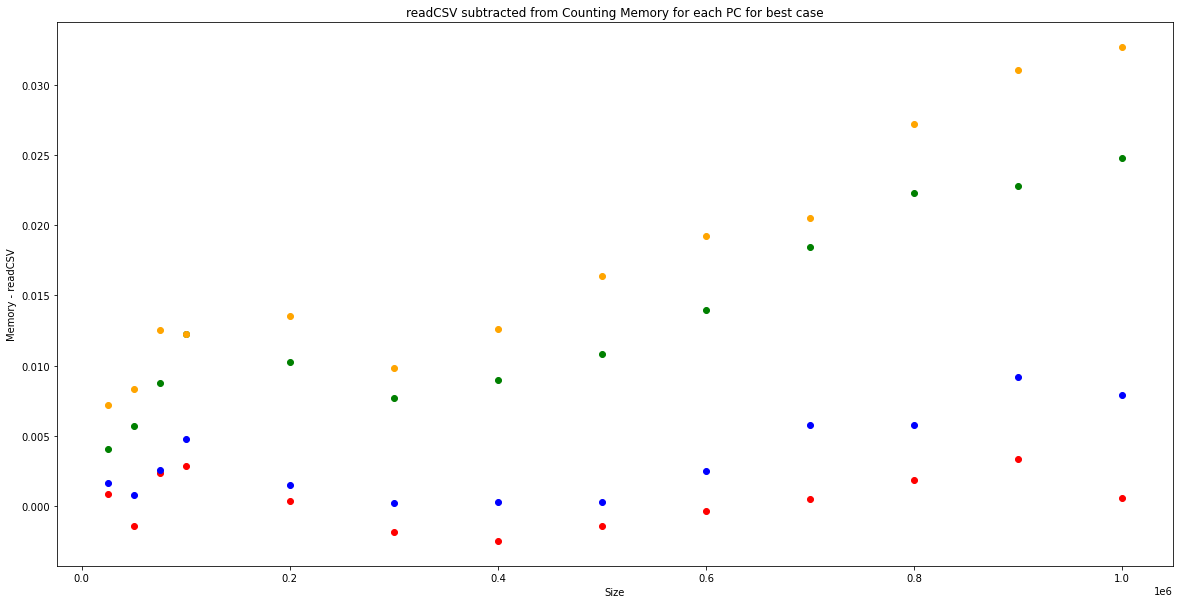

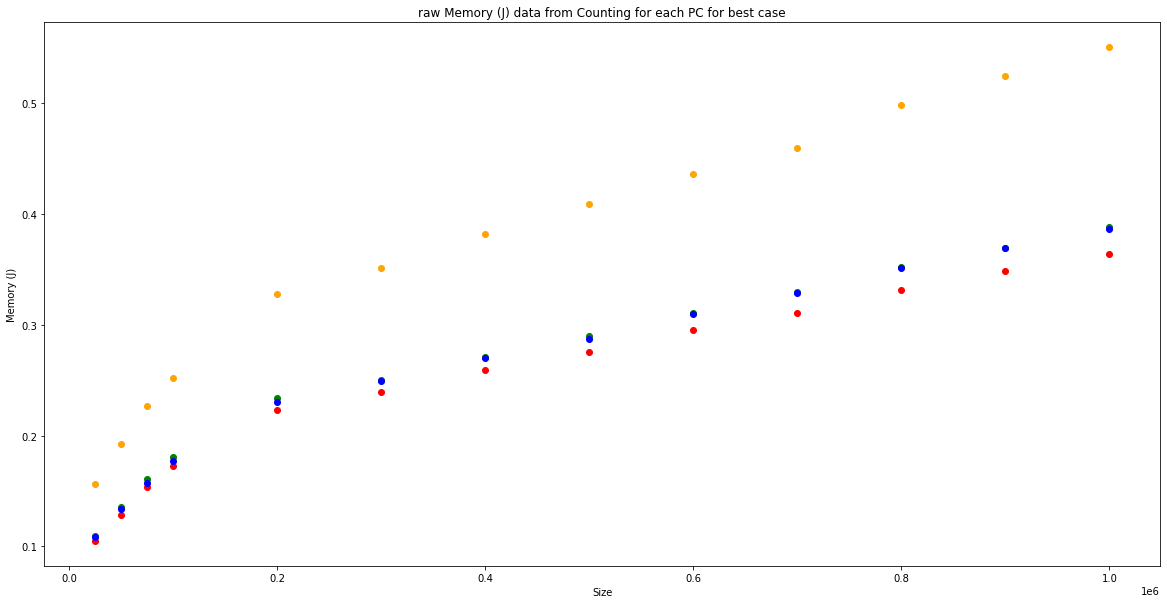

In [101]:
plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

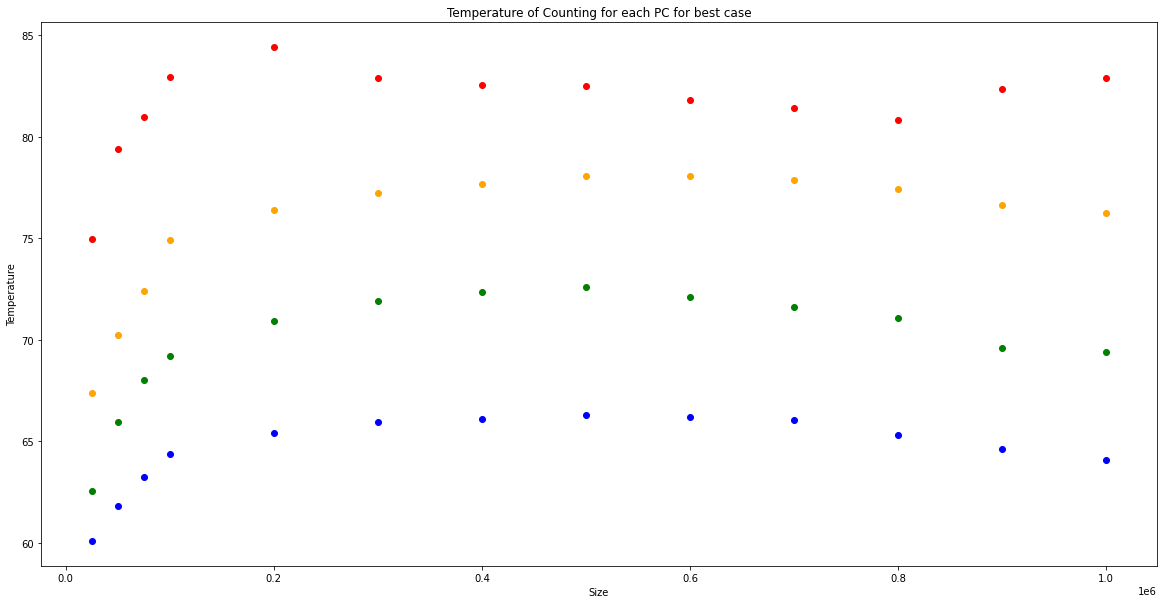

In [102]:
plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

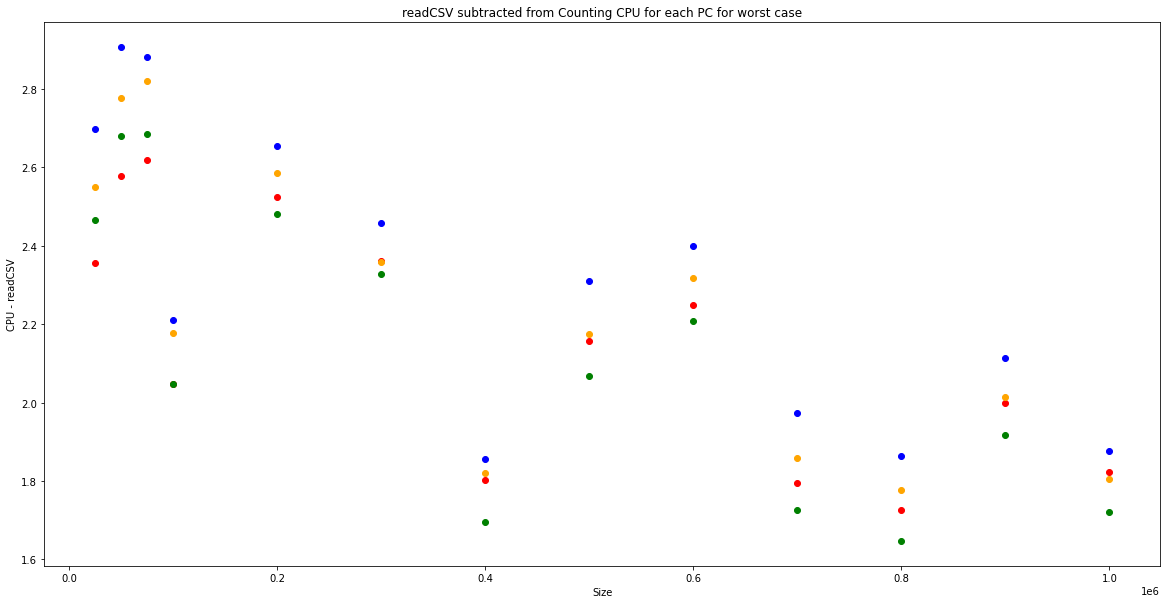

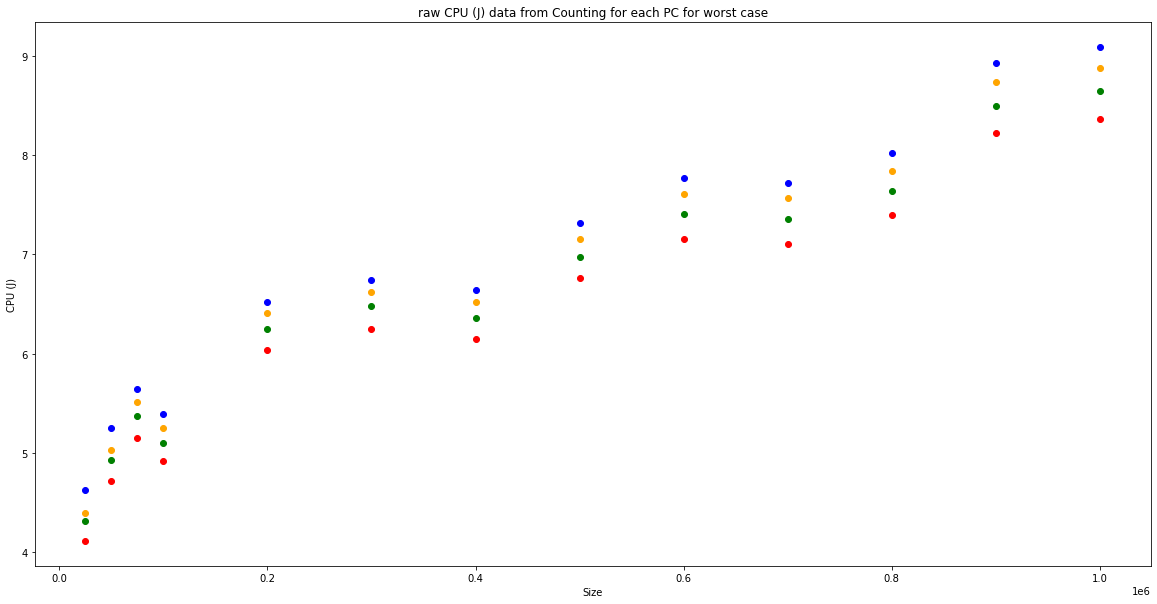

In [103]:

plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")


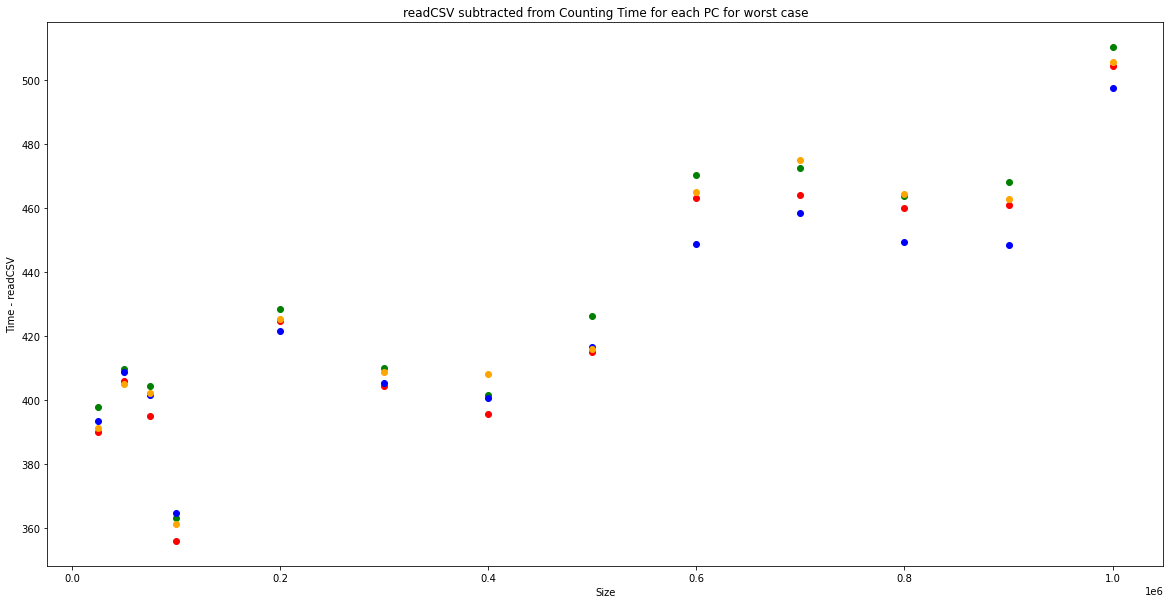

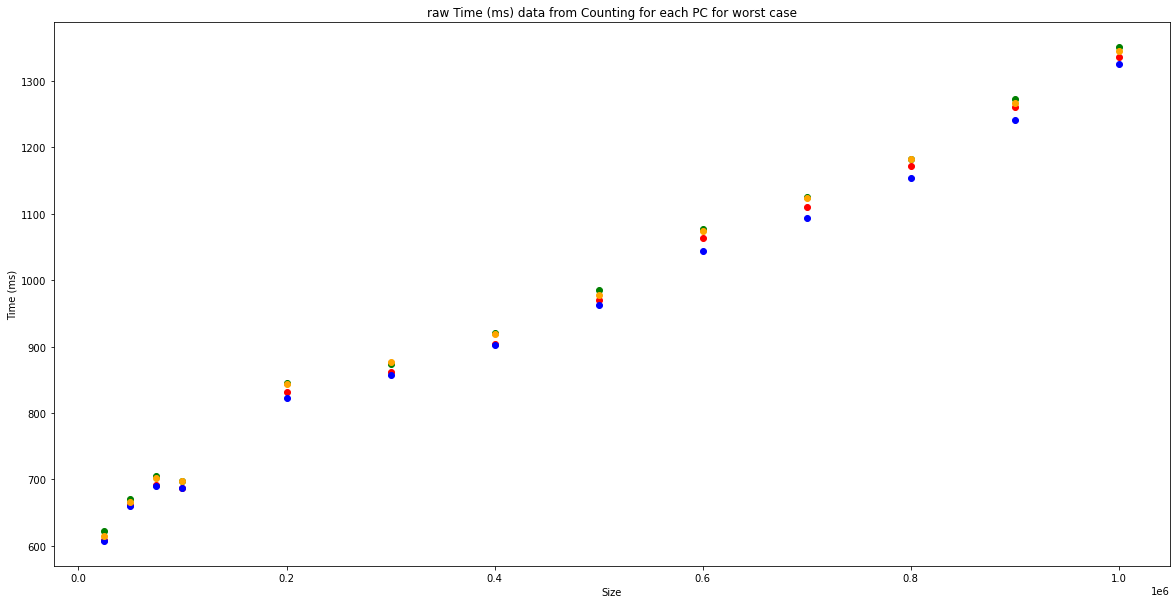

In [104]:
plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

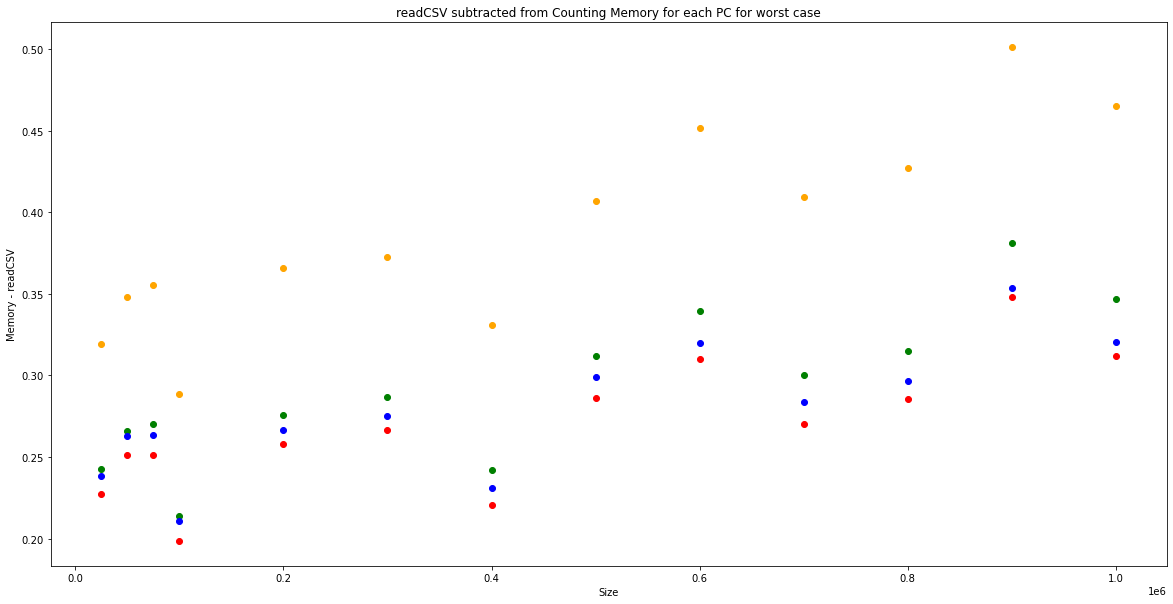

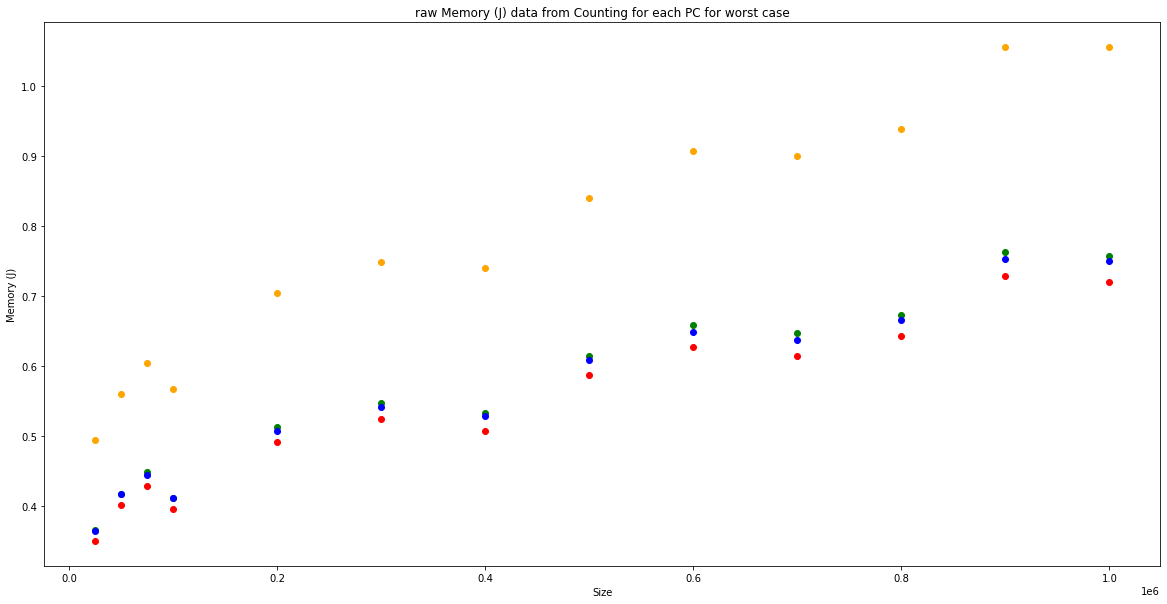

In [105]:
plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

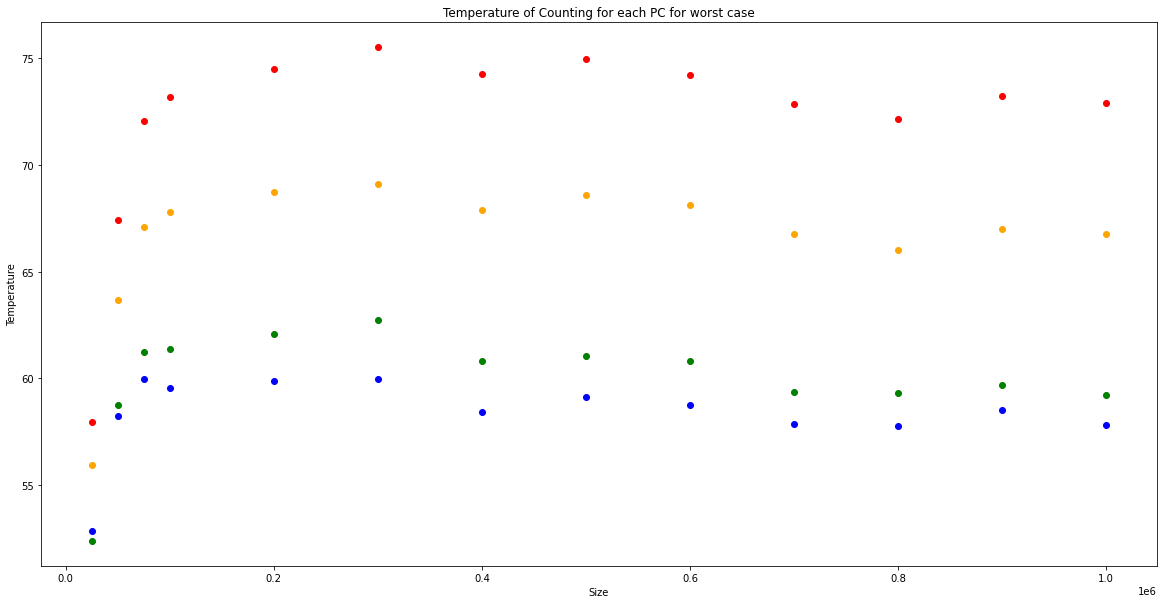

In [106]:
plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

In [107]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(20,10))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

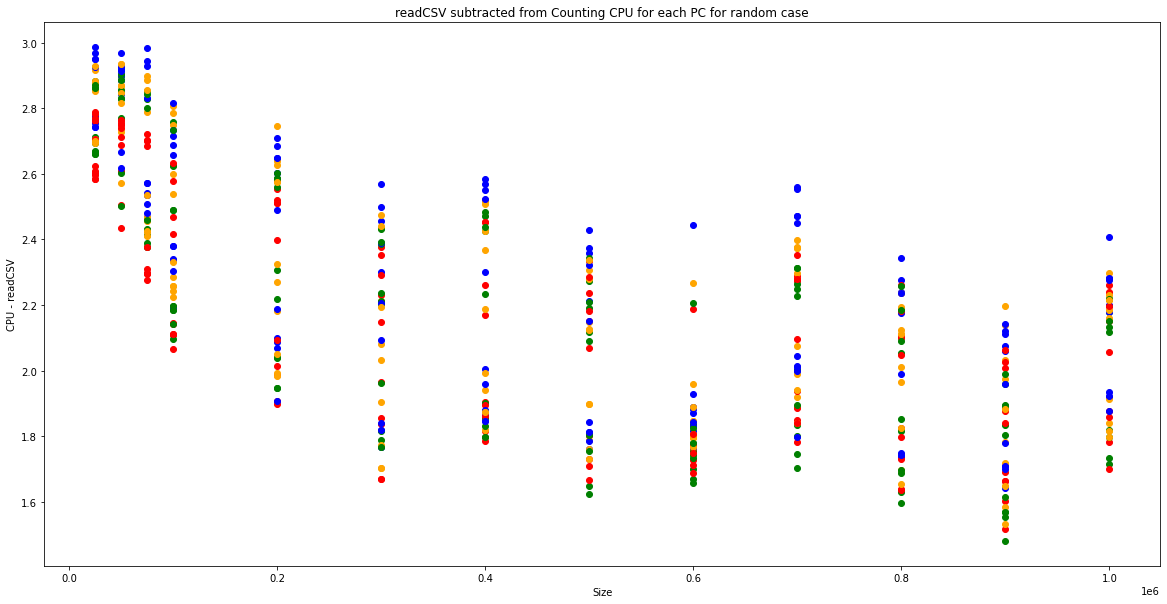

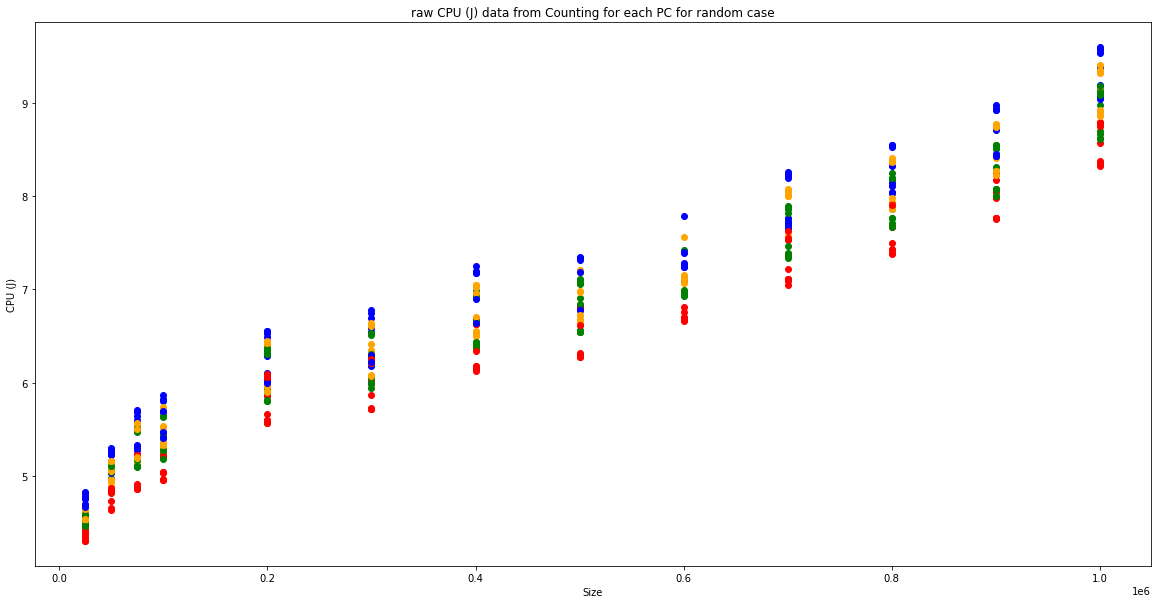

In [108]:

plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


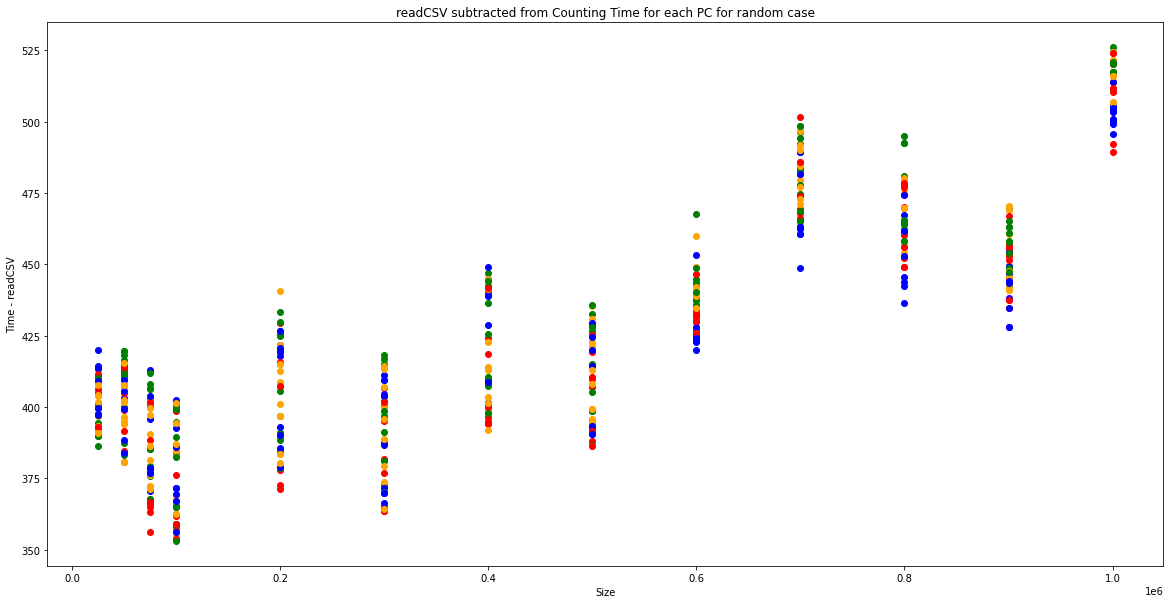

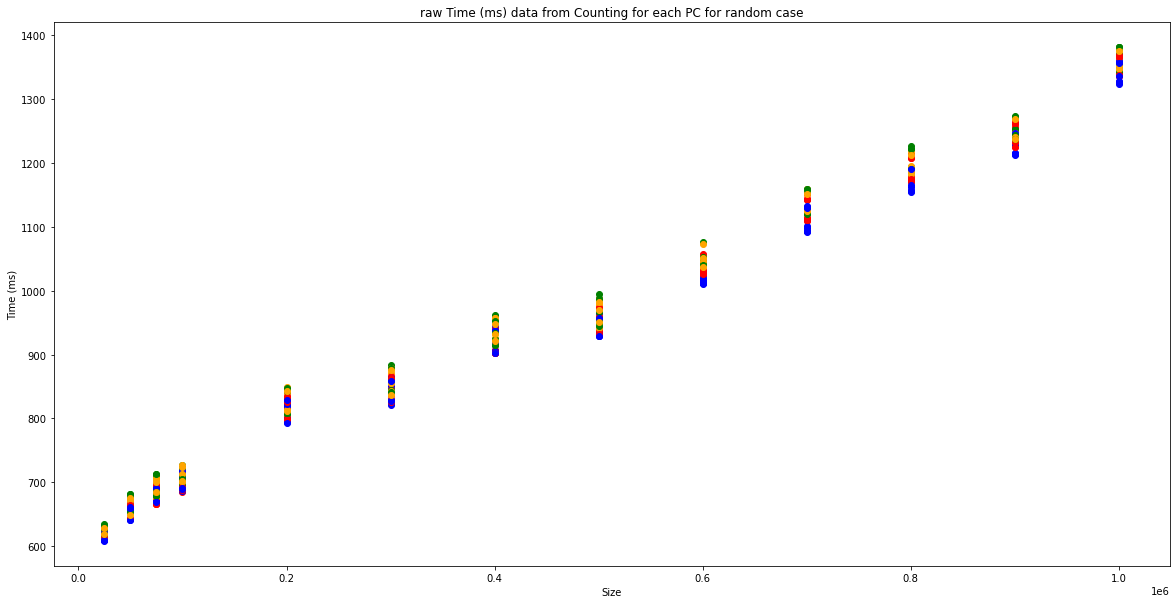

In [110]:

plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


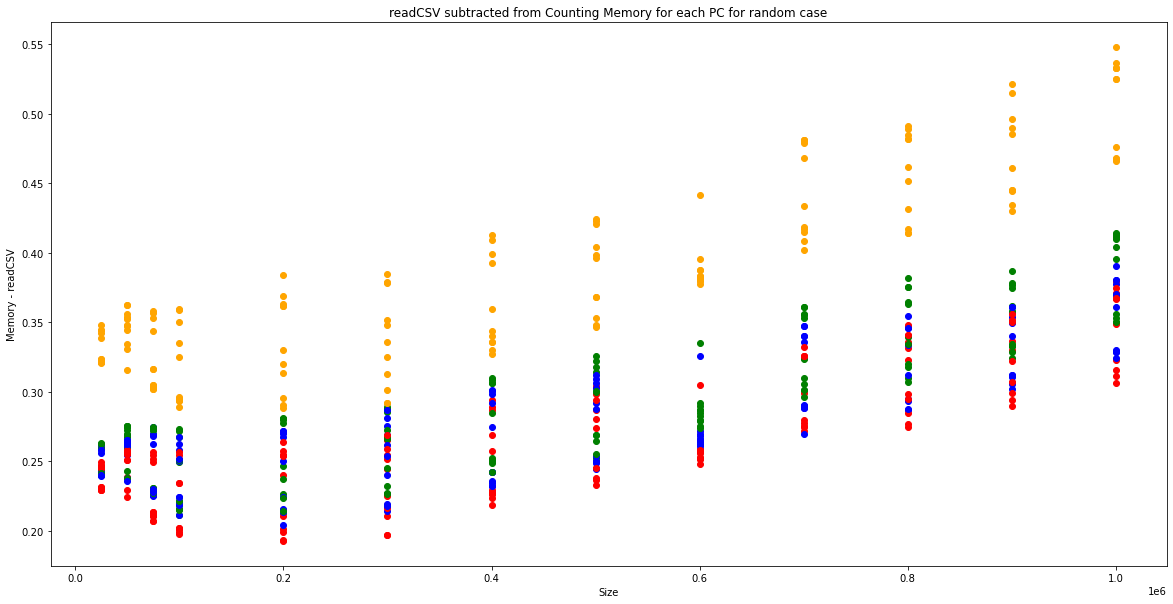

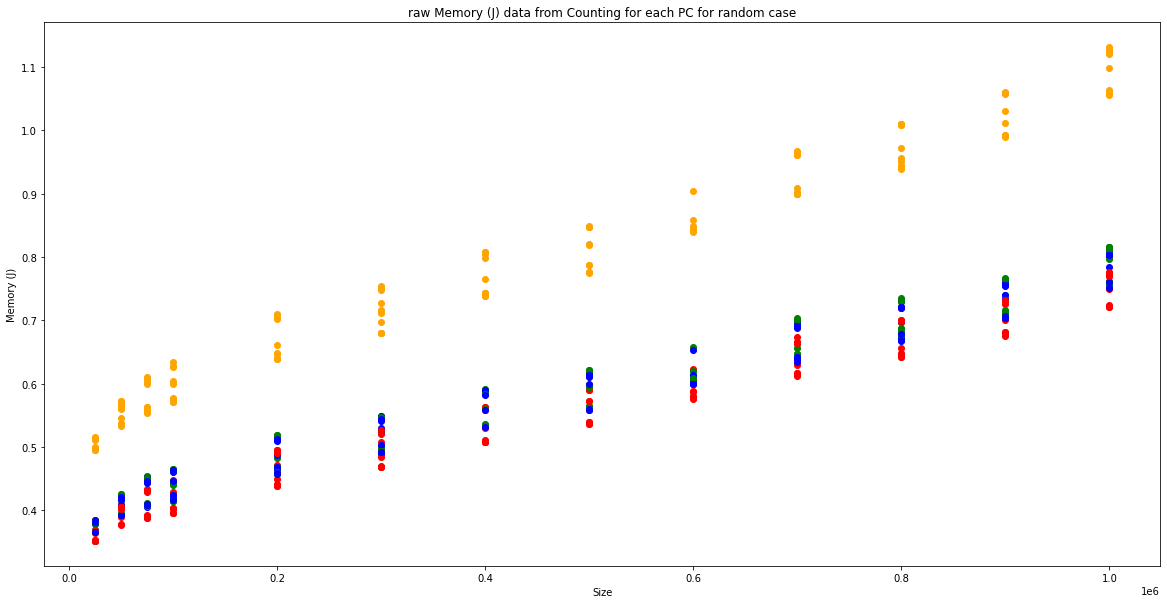

In [111]:

plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


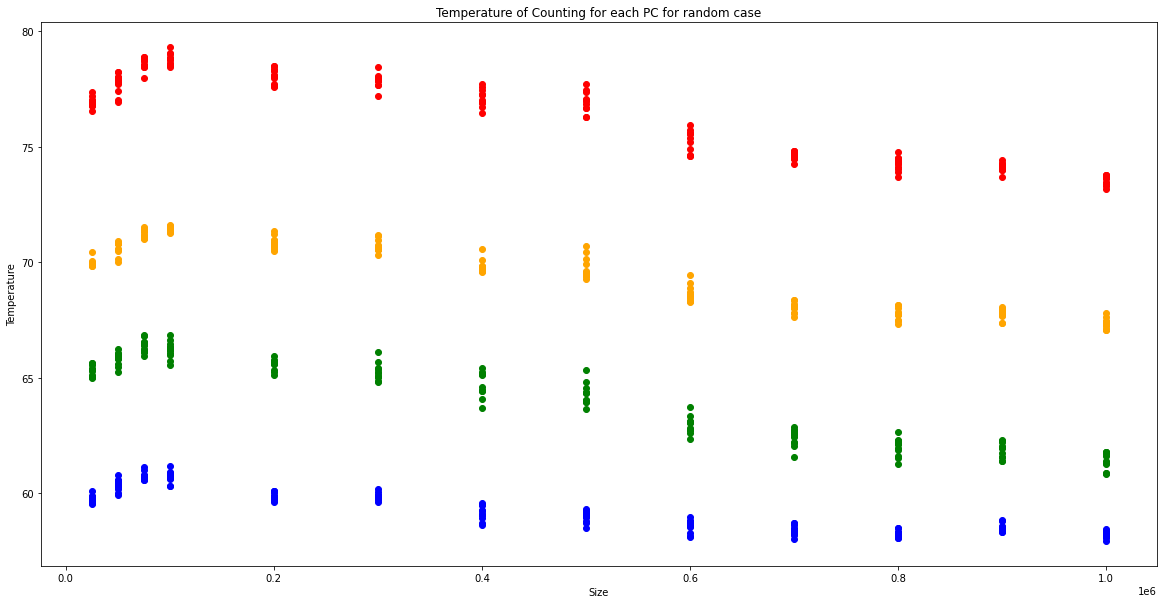

In [112]:

plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")
